Note: this takehome exercise was sourced from https://www.interviewquery.com/ 

https://www.interviewquery.com/takehomes/doordash-1



![Doordash](https://raw.githubusercontent.com/interviewquery/takehomes/doordash_1/doordash_1/logo.png)
# Overview

In this exercise, you will use your machine learning experience to solve
a straightforward but challenging prediction​ ​problem.​ ​The​ ​exercise​
​contains two​​ parts​

1. Building​ ​a​ ​machine​ ​learning​ model​ ​ ​for​ ​a​ ​prediction ​ task​ 
2. Writing ​ an​ ​ application​ ​ to​ ​ make​ ​ ​predictions ​ using​ ​ ​that​ ​model.

In Part 1, we would love to have you exhibit your modeling skills. You
will be evaluated on the following - performance on the test set,
feature engineering choices including features used and encoding of
features, data processing, choice of models used, description of model
performance and insights and observations from the​ ​model.

Part 2 is your chance to show off your software engineering skills. This
includes performance of the application, adherence to common software
engineering patterns (unit tests, modular code, etc.) and ability to
make educated​ ​trade-offs​ ​based​ ​on​ ​the​ ​given ​ constraints.​

**NOTE:** For​ this part, you must use a production ready language like
Python. Thus, please do not use R.

# Problem ​Description 

When​ a​ ​consumer​ ​places​ ​an​ ​order​ ​on​ DoorDash,​​ we​ ​ show​ ​ the​ ​ ​expected ​
​time of​​ ​delivery.​ ​It​ ​is​ ​very ​important​ ​for​ DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the
estimated time taken for a delivery and write an application that can
make these predictions.

Concretely, for a given delivery you must predict the ​**total delivery
duration seconds** , i.e., the time taken from

- Start:​ ​the​ ​time​ ​consumer​ ​submits​ ​the​ ​order ​ (​`created_at`) ​ to​
- End:​ ​when​ ​the​ ​order​ ​will​ ​be​ ​delivered​ to​ ​ ​the​ consumer​​
​(`actual_delivery_time`).

To​ ​help​ ​with​ ​this,​ ​we​ ​have​ ​provided

-   `historical_data.csv`:​ ​table​ ​of​ ​historical​ ​deliveries

-   `data_to_predict.json`: ​ ​Json​ ​list​ ​of​ ​deliveries​ ​that​ ​you​ ​must​
    ​predict​ ​on​ ​(for ​​the​ ​second​ ​part)

-   `data_description.txt`:​ ​ description​ ​ of​ ​ all​ ​ columns​ ​ in​​ `historical_data.csv`​ ​and​ ​details​ of​ `data_to_predict.json`

# Requirements

## Part ​ 1​ 

-   Build a model to predict the total delivery duration seconds (as
    defined above). Feel free to generate additional​ ​features​ ​from​ ​the ​ given​ ​ data​ ​ to​ ​ improve​ ​ model​ ​performance.​
-   Explain a) model(s) used, b) how you evaluated your model
    performance on the historical data, c) any data processing you
    performed on the data, d) feature engineering choices you made
    and e) other information​ ​you​ ​would​ ​like​ ​us​ ​to​ ​know​ ​about​ ​your​
    ​modeling​ ​approach.
-   Based ​ on​ ​ the​ ​ ​findings ​​from​ ​the​ ​model,​ list​​ ​recommendations​ to​​
    ​reduce​ ​delivery​ ​time

### Deliverables 

-   Submit one document that includes a write-up explaining your model,
    choices made and discussion on the​ ​questions ​ above.​
-   Submit​ ​the​ ​code​ ​used​ ​for​ ​this​ ​part

## Part ​ 2​ 
-   Write an application that accepts data from the json file
    (`data_to_predict.json`), uses the model to make a prediction for each
    delivery in the json file and writes out predictions to a new ​*tab separated file* (`tsv`) with​ ​columns​ ​-​ ​`delivery_id`, ​`predicted_delivery_seconds`

-   Your predictions on this test data set will be evaluated using RMSE
    (Root Mean Squared Error) and your ​ score​ ​ must​ ​ exceed​ ​ a​ ​ baseline​
    ​ set​ ​ for​ ​ the​ ​ ​task.

### Deliverables 

-   Code that ​​outputs a​ ​`tsv`​ ​file​ ​that​ ​gives ​the​​ ​prediction​ ​for​ ​the​
     `data_to_predict.json` data.​ This application (that makes
    predictions) must be runnable from the command line with
    `data_to_predict.json` passed as input. Include instructions for
    running the code (dependencies,​ ​packages​ ​required,​ ​etc.)

# Notes 

We expect the exercise to take 5-6 hours in total, but feel free to
spend as much time as you like on it. Feel free to​ ​use​ ​any​ ​open​ ​source​
​packages​ ​for​ ​the​ ​task.

**Thank**​ ​**you**​ ​**for**​ ​**your**​ ​**hard**​ ​**work!**​ ​**Please**​ ​**let**​
​**us**​ ​**know**​ ​**if**​ ​**you**​ ​**have**​ ​**any**​ ​**questions.**​ ​**Good**​
​**luck!**


In [1]:
!git clone --branch doordash_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/doordash_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1768, done.
remote: Counting objects: 100% (576/576), done.
remote: Compressing objects: 100% (455/455), done.
remote: Total 1768 (delta 169), reused 481 (delta 120), pack-reused 1192
Receiving objects: 100% (1768/1768), 297.30 MiB | 5.26 MiB/s, done.
Resolving deltas: 100% (619/619), done.
/Users/moliver/coding/DoorDash/takehomes/doordash_1
data_description.txt historical_data.csv  metadata.json
data_to_predict.json logo.png             takehomefile.ipynb


In [87]:
!cat data_description.txt

#### Data description #### 
The attached file `historical_data.csv` contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds 
The target value to predict here is the total seconds value between `created_at` and `actual_delivery_time`. 

We have added noise to the dataset to obfuscate certain business details. Both `historical_data.csv` and `data_to_predict.json` include similar noise. We will only be evaluating your model's performance on this noisy, artificial dataset. The baseline model we will compare it was also trained and evaluated on the same noisy dataset.

#### Columns in historical_data.csv

### Time features
market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
created_at

In [2]:
# Write your code here
# Load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from platform import python_version

print(f"\t- Python Version: {python_version()}")
print(f"\t– Pandas Version: {pd.__version__}")
print(f"\t– NumPy  Version: {np.__version__}")

import matplotlib.pyplot as plt
import seaborn as sns



	- Python Version: 3.9.16
	– Pandas Version: 1.5.3
	– NumPy Version: 1.23.5


In [4]:
# Some stuff from the Feature Engineering Course:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [6]:
#import os 
#dir_path = os.path.dirname(os.path.realpath(__file__))

NameError: name '__file__' is not defined

In [179]:
historical_data = pd.read_csv('takehomes/doordash_1/historical_data.csv')
#historical_data = pd.read_csv('DoorDash/takehomes/doordash_1/historical_data.csv')

In [180]:
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [9]:
# Define a column for the total order time
from datetime import date, timedelta
import datetime



In [29]:
# return time delta between 'created_at' and 'actual_delivery_time' in seconds
def CalcTimeDelta(x):
    
    date_one_string=x['created_at']
    date_two_string=x['actual_delivery_time']

    # May need to check if date_to_string is 'nan' if data not already cleaned
    
    # Example: 2015-02-15 03:20:26
    date_one = datetime.datetime.strptime(date_one_string,"%Y-%m-%d %H:%M:%S")
    date_two = datetime.datetime.strptime(date_two_string,"%Y-%m-%d %H:%M:%S")
    
    date_delta = date_two - date_one
    return date_delta.seconds
    
    

In [181]:
# problem: some delivery times are nan because of delivery failure (i assume)
# could drop na first, or return nan for total time for now.
historical_data.dropna(subset='actual_delivery_time',inplace=True)


historical_data['total_time']=historical_data.apply(CalcTimeDelta,axis=1)

In [182]:
historical_data.head(1)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779


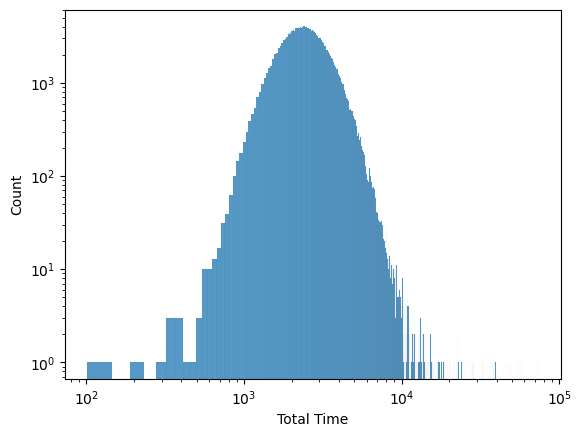

In [183]:

ax=sns.histplot(data=historical_data,x='total_time')
ax.set_xlabel('Total Time')
ax.set_yscale('log')
ax.set_xscale('log')

Can see that this is a log-normal distribution. For models, especially linear models, we will want to use y=log(total_time) as the target to fit.

In [184]:
historical_data['log_total_time']=historical_data.apply(lambda x : np.log(x['total_time']),axis=1)

Text(0.5, 0, 'Total Time (log)')

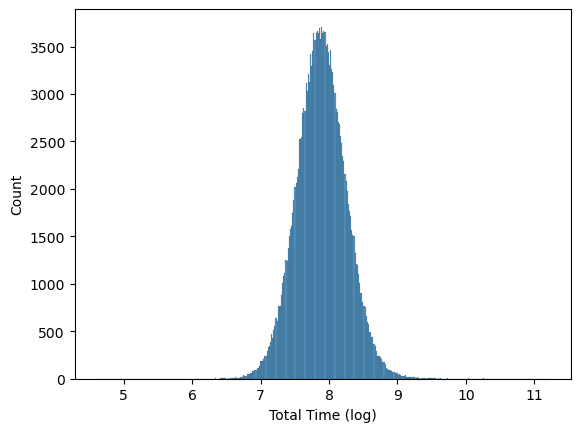

In [185]:
ax=sns.histplot(data=historical_data,x='log_total_time')
#ax=sns.displot(data=historical_data,x='log_total_time')

ax.set_xlabel('Total Time (log)')

In [186]:
total_time_mean = historical_data['log_total_time'].mean()
total_time_std  = historical_data['log_total_time'].std()
print(f"Log total time has mean {total_time_mean:.2f} and std {total_time_std:.2f}")

Log total time has mean 7.89 and std 0.36


# Notes:
The total time should be a sum of several times, two of which are already modelled (estimated_order_place_duration, estimated_store_to_consumer_driving_duration).
Some times that remain:
* preparation time
* driver pickup time


In [ ]:
# Could define new target feature: total time - (order time + drive time)
# make use of modelled features.

# Categorical Features

Some categorical information in the data:
* order_protocol
* market_id
* store_primary_category

Store_primary_category is a string. Will need to deal with this for modeling. Three choices:
* Ordinal encoding
* One-hot encoding
* Target encoding

For the first two, refer to https://www.kaggle.com/code/alexisbcook/categorical-variables
For the latter, refer to https://www.kaggle.com/code/ryanholbrook/target-encoding
With that, need to be careful to do the train test split first.

I suspect only the first two will matter. Before studying these in depth, let's use the mutual information tool to check their importance. For studying the M.I, we should use ordinal encoding for the string categorical.


In [143]:
from sklearn.model_selection import train_test_split

# Divide data into training and validation subsets
#X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
#                                                                random_state=0)

In [187]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
#OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
historical_data['store_category_ordinal']=ordinal_encoder.fit_transform(historical_data[['store_primary_category']])
#encoded=ordinal_encoder.fit_transform(historical_data[['store_primary_category']])

In [188]:
# def make_mi_scores(X, y, discrete_features):

X_for_mi = historical_data[['order_protocol','market_id','store_category_ordinal']].dropna()
y_for_mi = historical_data['log_total_time'].dropna()

# align
(y_for_mi,X_for_mi) = y_for_mi.align(X_for_mi,join='inner',axis=0)

print(X_for_mi.head())
print(y_for_mi.head())

mi_scores=make_mi_scores(X_for_mi,y_for_mi,discrete_features='auto')

print(mi_scores)


    order_protocol  market_id  store_category_ordinal
0              1.0        1.0                     4.0
1              2.0        2.0                    47.0
8              3.0        2.0                    36.0
14             1.0        1.0                    39.0
15             1.0        1.0                    39.0
0     8.237215
1     8.300032
8     7.368970
14    7.728856
15    8.002360
Name: log_total_time, dtype: float64
store_category_ordinal    0.014574
order_protocol            0.009479
market_id                 0.006148
Name: MI Scores, dtype: float64


This is suprising, and suggests that the market_id is not important comparied to the store type and order protocol

In [69]:
# examine with heatmaps

# what I'm thinking: plotting maps with the mean value in each bin as the z-axis



Text(0, 0.5, 'Total Time (log)')

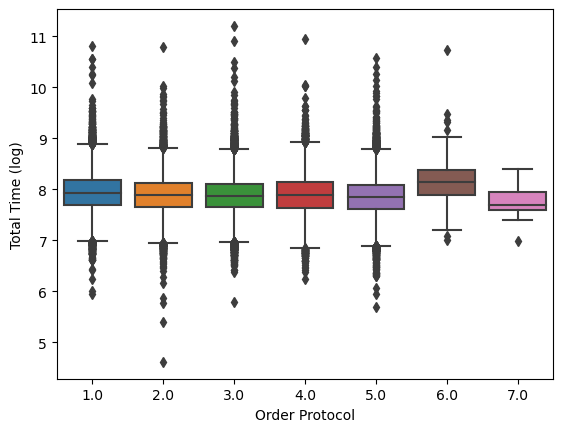

In [189]:
ax=sns.boxplot(historical_data,x='order_protocol',y='log_total_time')
ax.set_xlabel('Order Protocol')
ax.set_ylabel('Total Time (log)')

Text(0, 0.5, 'Total Time (log)')

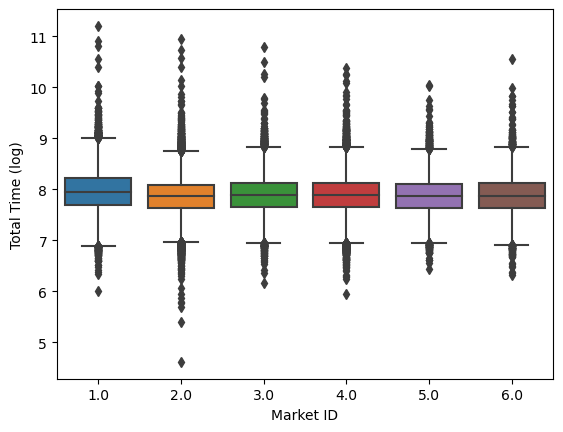

In [190]:
ax=sns.boxplot(historical_data,x='market_id',y='log_total_time')
ax.set_xlabel('Market ID')
ax.set_ylabel('Total Time (log)')

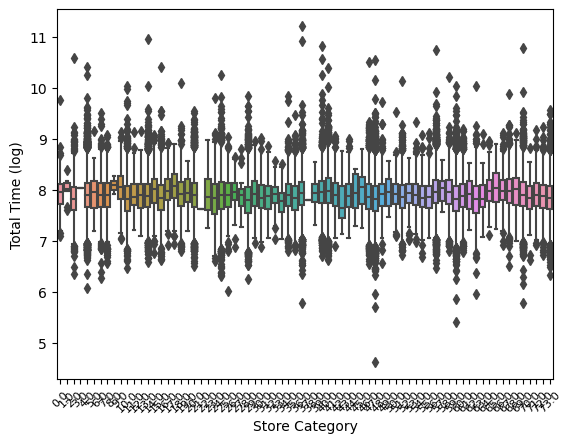

In [191]:
ax=sns.boxplot(historical_data,x='store_category_ordinal',y='log_total_time')
ax.set_xlabel('Store Category')
# could get individual labels back from the encoder
ax.set_ylabel('Total Time (log)')
ax.xaxis.set_tick_params(labelsize=8,rotation=45)


# Order Features

* total_items: 
* subtotal: (in cents)
* num_distinct_items: 
* min_item_price: (in cents)
* max_item_price:

In [192]:
# Try the mutual information approach

X_order_for_mi = historical_data[['total_items','subtotal','num_distinct_items','min_item_price','max_item_price']].dropna()
y_order_for_mi = historical_data['log_total_time'].dropna()

# align
(y_order_for_mi,X_order_for_mi) = y_order_for_mi.align(X_order_for_mi,join='inner',axis=0)

print(X_order_for_mi.head())
print(y_order_for_mi.head())

mi_order_scores=make_mi_scores(X_order_for_mi,y_order_for_mi,discrete_features='auto')

print(mi_order_scores)

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price
0            4      3441                   4             557            1239
1            1      1900                   1            1400            1400
2            1      1900                   1            1900            1900
3            6      6900                   5             600            1800
4            3      3900                   3            1100            1600
0    8.237215
1    8.300032
2    7.484930
3    8.031060
4    7.779049
Name: log_total_time, dtype: float64
subtotal              0.034274
num_distinct_items    0.015570
max_item_price        0.011412
total_items           0.010700
min_item_price        0.000000
Name: MI Scores, dtype: float64


As one would expect, the minimum item price is not important. The number of distinct items tells us more than the total number, which is interesting. The best predictor seems to be the subtotal.

A good list of features to pass to the final model is thus:
* subtotal
* num_distinct_items

An interesting question: do these variables correlate with the type of restaurant, and does that effect how the type of restaurant tells us about the total time.


# Market Features
total_onshift_dashers: Number of available dashers who are within 10 miles of the store at the time of order creation 
total_busy_dashers: Subset of above `total_onshift_dashers` who are currently working on an order
total_outstanding_orders: Number of orders within 10 miles of this order that are currently being processed.


In [193]:
# Make some new features:
historical_data['total_avail_dashers']=historical_data['total_onshift_dashers']-historical_data['total_busy_dashers']

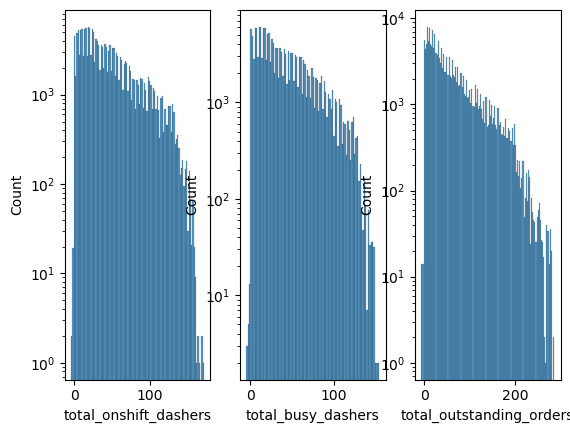

In [194]:
fig, axes = plt.subplots(nrows=1,ncols=3)
sns.histplot(data=historical_data,x='total_onshift_dashers',ax=axes[0])
sns.histplot(data=historical_data,x='total_busy_dashers',ax=axes[1])
sns.histplot(data=historical_data,x='total_outstanding_orders',ax=axes[2])
for ax in axes:
    ax.set_yscale('log')


<Axes: xlabel='total_avail_dashers', ylabel='Count'>

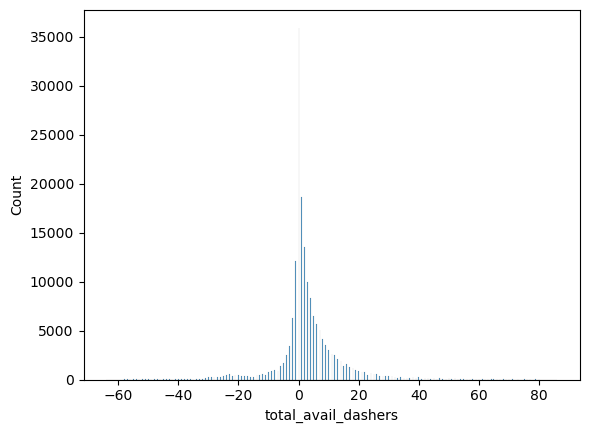

In [195]:
sns.histplot(data=historical_data,x='total_avail_dashers')

How can there be negative available dashers? Are there cases where the total is missing maybe?

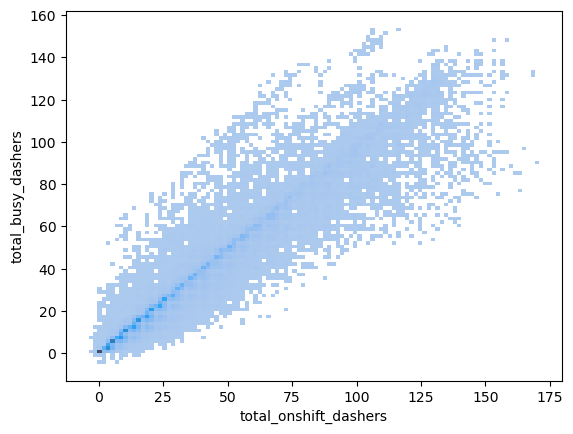

In [196]:
ax=sns.histplot(data=historical_data,x='total_onshift_dashers',y='total_busy_dashers')

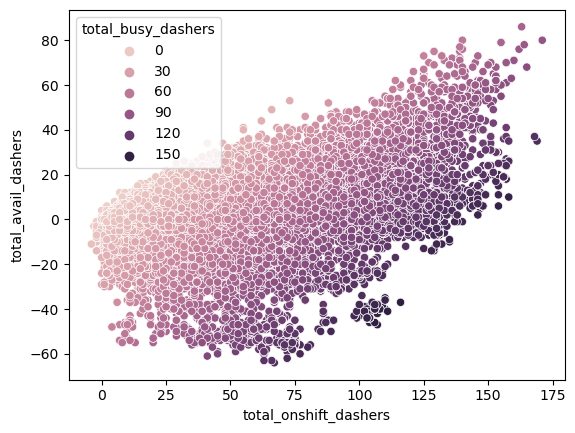

In [197]:
shifter_data=historical_data[['total_onshift_dashers','total_busy_dashers']]
#shifter_data.pivot('total_onshift_dashers','total_busy_dashers')
ax=sns.scatterplot(data=historical_data,x='total_onshift_dashers',y='total_avail_dashers',hue='total_busy_dashers')
#ax=sns.scatterplot(shifter_data)
#ax=sns.heatmap(shifter_data)

In [121]:
shifter_data.head(30)

,total_onshift_dashers,total_busy_dashers
0,33.0,14.0
1,1.0,2.0
2,1.0,0.0
3,1.0,1.0
4,6.0,6.0
5,2.0,2.0
6,10.0,9.0
7,7.0,8.0
8,8.0,6.0
9,2.0,2.0


Cases such as index 27 show that some rows have more busy dashers than total dashers, violating the subset condition given.

Since there is clearly an issue with these variables, I would be hesitent about including them in a model. But they are probably extremely useful. 

Is there a helpful way to transform these variables? May just want to standardize them.

Next: calculate mi.


<Axes: xlabel='total_outstanding_orders', ylabel='log_total_time'>

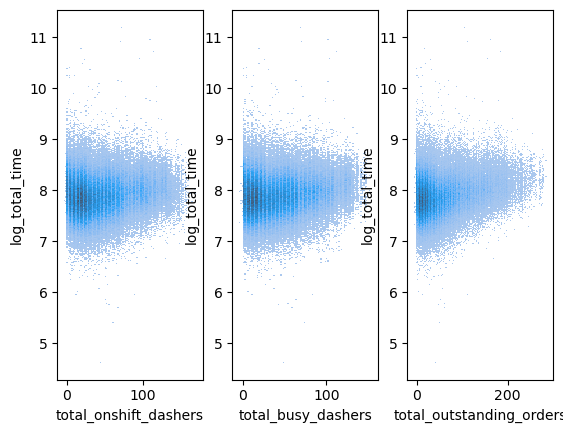

In [198]:
fig, axes = plt.subplots(nrows=1,ncols=3)
sns.histplot(data=historical_data,x='total_onshift_dashers',y='log_total_time',ax=axes[0])
sns.histplot(data=historical_data,x='total_busy_dashers',y='log_total_time',ax=axes[1])
sns.histplot(data=historical_data,x='total_outstanding_orders',y='log_total_time',ax=axes[2])


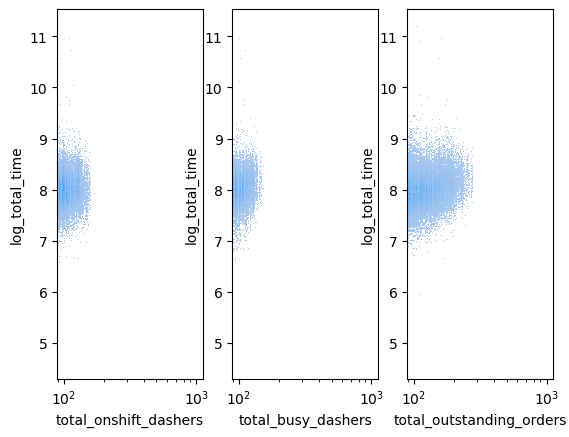

In [156]:
fig, axes = plt.subplots(nrows=1,ncols=3)
sns.histplot(data=historical_data,x='total_onshift_dashers',y='log_total_time',ax=axes[0])
sns.histplot(data=historical_data,x='total_busy_dashers',y='log_total_time',ax=axes[1])
sns.histplot(data=historical_data,x='total_outstanding_orders',y='log_total_time',ax=axes[2])
for ax in axes:
    ax.set_xscale('log')

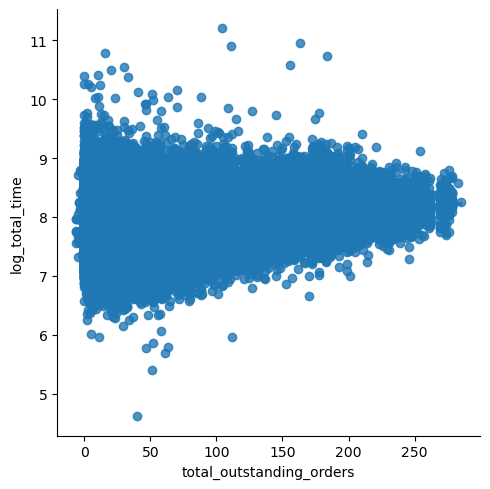

In [158]:
sns.lmplot(data=historical_data,x='total_outstanding_orders',y='log_total_time')


Should we use the log of these variables, the orders and dashers? That could help with using  linear regression. Although so could standardization. Using log (1+x) to avoid issue when x = 0
Also, cutting off the negative values using a maximum

In [223]:
historical_data['log_total_onshift_dashers']=np.log(1+np.maximum(0,historical_data['total_onshift_dashers']))
historical_data['log_total_busy_dashers']=np.log(1+np.maximum(0,historical_data['total_busy_dashers']))
historical_data['log_total_outstanding_orders']=np.log(1+np.maximum(0,historical_data['total_outstanding_orders']))
historical_data.loc[:,['log_total_outstanding_orders','log_total_busy_dashers','log_total_outstanding_orders']].head()

,log_total_outstanding_orders,log_total_busy_dashers,log_total_outstanding_orders
0,3.091042,2.708050,3.091042
1,1.098612,1.098612,1.098612
2,0.000000,0.000000,0.000000
3,1.098612,0.693147,1.098612
4,2.302585,1.945910,2.302585


<Axes: xlabel='log_total_onshift_dashers', ylabel='Count'>

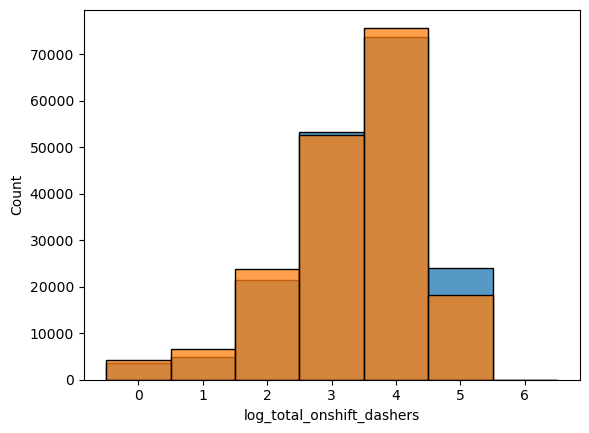

In [224]:
ax=sns.histplot(data=historical_data,x='log_total_onshift_dashers',discrete=True)
sns.histplot(data=historical_data,x='log_total_busy_dashers',ax=ax,discrete=True)

# Modeled Features
These features from additionaly models give estimates for the time to make the order and the driving time:
* estimated_order_place_duration
* estimated_store_to_consumer_driving_duration

I'm curious what kind of distributions these have. I'd imagine the order placing is quick, on the order of seconds.
Does the driving duration follow a log-normal distribution like the total time?
Does the driving duration depend on the market?

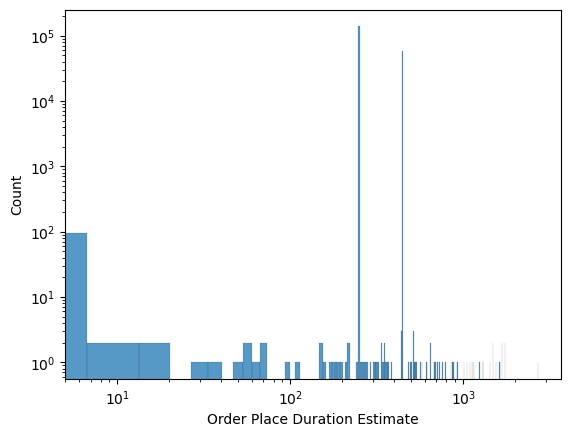

In [225]:
ax=sns.histplot(data=historical_data,x='estimated_order_place_duration')
ax.set_xlabel('Order Place Duration Estimate')
ax.set_xscale('log')
ax.set_yscale('log')


Text(0.5, 0, 'Drive Duration Estimate')

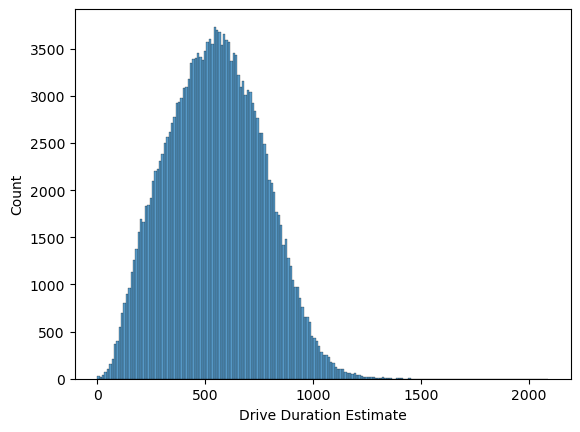

In [91]:
ax=sns.histplot(data=historical_data,x='estimated_store_to_consumer_driving_duration')
ax.set_xlabel('Drive Duration Estimate')
#ax.set_xscale('log')
#ax.set_yscale('log')

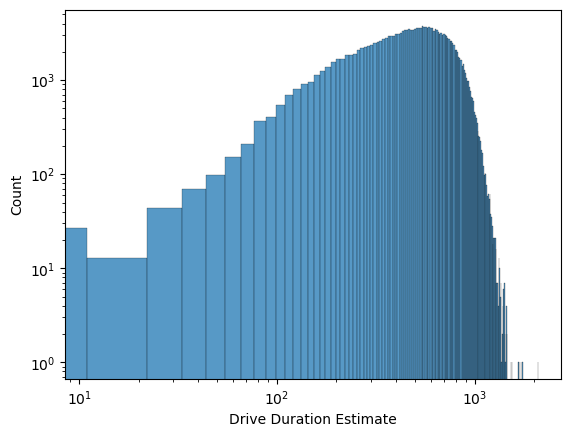

In [93]:
ax=sns.histplot(data=historical_data,x='estimated_store_to_consumer_driving_duration')
ax.set_xlabel('Drive Duration Estimate')
ax.set_xscale('log')
ax.set_yscale('log')

That is not log-normal. Doesn't look familar, yet. Also, it is entertaining how some drive times are esimated around 10 seconds. Could these be orders only a block a way?

<Axes: xlabel='market_id', ylabel='estimated_store_to_consumer_driving_duration'>

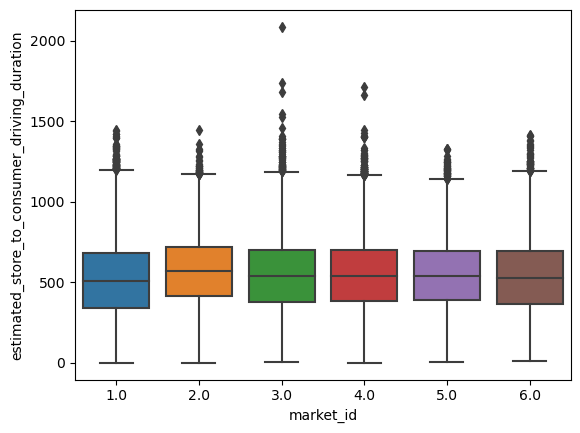

In [94]:
ax=sns.boxplot(data=historical_data,x='market_id',y='estimated_store_to_consumer_driving_duration')
ax.set_xlabel('Market ID')

In [95]:
print(historical_data.columns)

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'total_time',
       'log_total_time', 'store_category_ordinal'],
      dtype='object')


In [96]:
# Now, define potential new target: total time - estimated times

historical_data['total_time_minus_est']=historical_data['total_time'] - historical_data['estimated_order_place_duration'] - historical_data['estimated_store_to_consumer_driving_duration']
historical_data.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_time,log_total_time,store_category_ordinal,total_time_minus_est
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779,8.237215,4.0,2472.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024,8.300032,47.0,2888.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781,7.484930,NaN,645.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075,8.031060,NaN,2340.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390,7.779049,NaN,1294.0


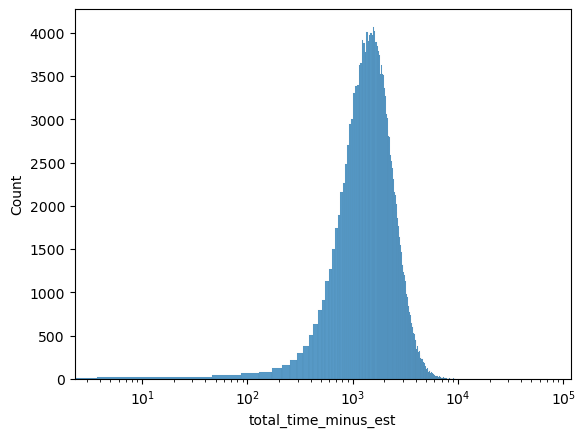

In [102]:
ax=sns.histplot(data=historical_data,x='total_time_minus_est')
ax.set_xscale('log')

Not quite log-normal now. Particularly with the heavier left tail. Close, though.

In [100]:
# one issue: now have rows where total_minus_est is negative.
# this should map to nan in the log.
historical_data['log_total_time_minus_est']=historical_data.apply(lambda x : np.log(x['total_time_minus_est']),axis=1)

/var/folders/9x/pkz__t1x5dqcm2rfgxsnfqg40000gn/T/ipykernel_2111/868663445.py:1: RuntimeWarning: invalid value encountered in log
  historical_data['log_total_time_minus_est']=historical_data.apply(lambda x : np.log(x['total_time_minus_est']),axis=1)


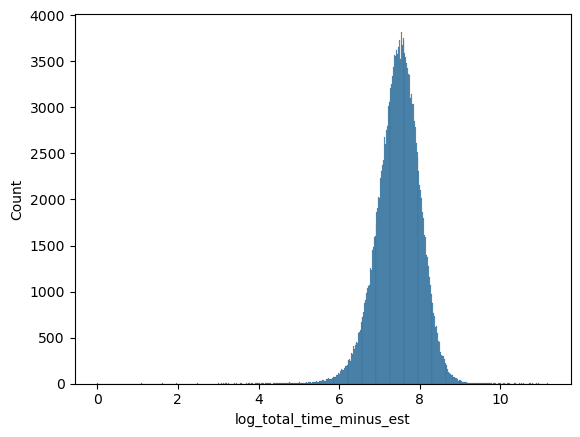

In [103]:
ax=sns.histplot(historical_data,x='log_total_time_minus_est')

In [105]:
total_time_minus_est_mean = historical_data['log_total_time_minus_est'].mean()
total_time_minus_est_std  = historical_data['log_total_time_minus_est'].std()
print(f"Log total time has mean {total_time_mean:.2f} and std {total_time_std:.2f}")
print(f"Log total time minus estimates has mean {total_time_minus_est_mean:.2f} and std {total_time_minus_est_std:.2f}")

Log total time has mean 7.89 and std 0.36
Log total time minus estimates has mean 7.47 and std 0.53


Subtracting these estimates reduced the log by a factor of 0.4 (corresponding to a scale of Exp(0.4)) and increased the standard deviation of the log form 0.36 to 0.53

# Time Features

Add new features: day of the week, hour of the day.

Some issues might arise with having very few entries for many hours of the day, especially at night. A tree based model would probably do fine with this though.

I suspect most of the information to be gained from this is replicated by the data on the number of dashers. Could analyze with mutual information? 

There is also a choice of using a continuous time of day (seconds since midnight for start of the order).

In [273]:
#
def GetDayOfWeekOrdinal(x):
    date_one_string=x['created_at']    
    # Example: 2015-02-15 03:20:26
    date_one = datetime.datetime.strptime(date_one_string,"%Y-%m-%d %H:%M:%S")
    
    return date_one.weekday()

def GetHourOfDayOrdinal(x):
    date_one_string=x['created_at']    
    # Example: 2015-02-15 03:20:26
    date_one = datetime.datetime.strptime(date_one_string,"%Y-%m-%d %H:%M:%S")
    return date_one.hour

def GetSecOfDay(x):
    date_one_string=x['created_at']    
    # Example: 2015-02-15 03:20:26
    date_one = datetime.datetime.strptime(date_one_string,"%Y-%m-%d %H:%M:%S")
    # How to get to second out of day? Maybe just use 60*60*hours + 60*minutes + seconds
    return date_one.hour*60*60 + date_one.minute*60 + date_one.second

historical_data['day_ordinal']=historical_data.apply(GetDayOfWeekOrdinal,axis=1)
historical_data['hour_ordinal']=historical_data.apply(GetHourOfDayOrdinal,axis=1)
historical_data['second_of_day']=historical_data.apply(GetSecOfDay,axis=1)
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_time,log_total_time,store_category_ordinal,total_avail_dashers,log_total_onshift_dashers,log_total_busy_dashers,log_total_outstanding_orders,day_ordinal,hour_ordinal,second_of_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,3779,8.237215,4.0,19.0,3.526361,2.708050,3.091042,4,22,80657
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,...,4024,8.300032,47.0,-1.0,0.693147,1.098612,1.098612,1,21,78565
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,...,1781,7.484930,NaN,1.0,0.693147,0.000000,0.000000,3,20,74368
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,...,3075,8.031060,NaN,0.0,0.693147,0.693147,1.098612,1,21,76905
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,...,2390,7.779049,NaN,0.0,1.945910,1.945910,2.302585,6,2,9636


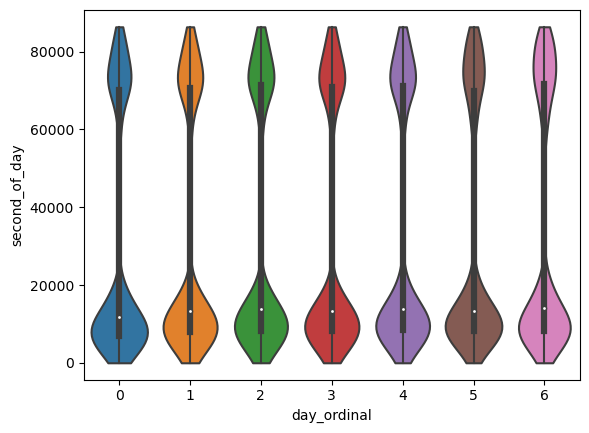

In [275]:
ax = sns.violinplot(data=historical_data,x='day_ordinal',y='second_of_day',cut=0)

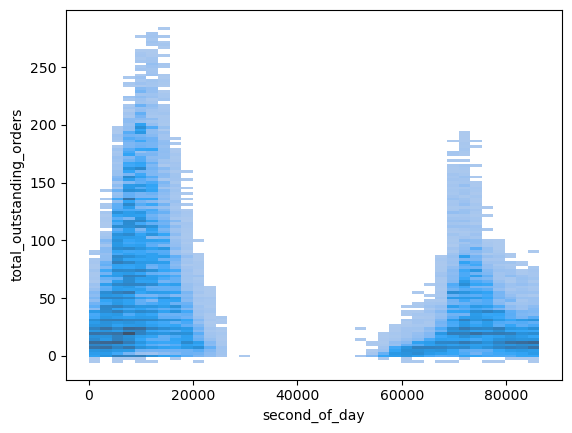

In [276]:
ax = sns.histplot(data=historical_data,x='second_of_day',y='total_outstanding_orders')

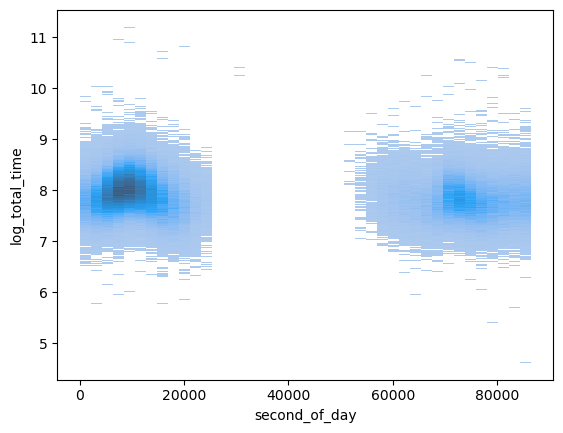

In [277]:
ax = sns.histplot(data=historical_data,x='second_of_day',y='log_total_time')

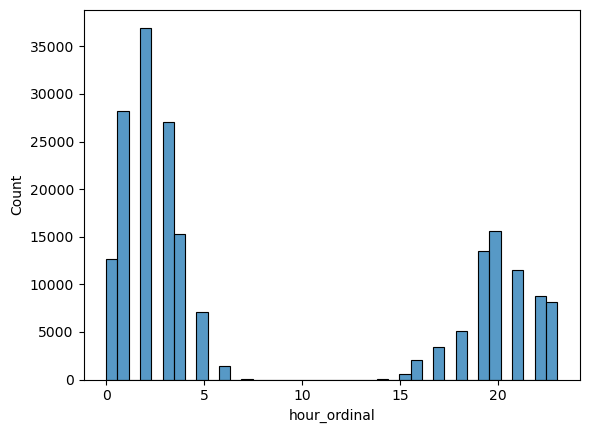

In [278]:
ax=sns.histplot(data=historical_data,x='hour_ordinal')

# Ideas for Time
Should shift the data with 24 hour modulus, sot that it can be centered. Also, I suspect that the times are GCT, and the markets are in the US. Are the markets in the data all in the same timezone? Should anything we do be based variables, such as means, calculated in groups by market id?

First, check how redundant the time information is with the dasher info.  Use mutual information. Although it could be useful to have a time only version in case the dasher info is missing (like in the future).

In [279]:
for col in historical_data:
    print(col)

market_id
created_at
actual_delivery_time
store_id
store_primary_category
order_protocol
total_items
subtotal
num_distinct_items
min_item_price
max_item_price
total_onshift_dashers
total_busy_dashers
total_outstanding_orders
estimated_order_place_duration
estimated_store_to_consumer_driving_duration
total_time
log_total_time
store_category_ordinal
total_avail_dashers
log_total_onshift_dashers
log_total_busy_dashers
log_total_outstanding_orders
day_ordinal
hour_ordinal
second_of_day


In [286]:
shifter_features=['total_onshift_dashers','total_busy_dashers','total_outstanding_orders']
shifter_time_mi_arrays=[]

#for i in range(len(shifter_features)):
#    shifter_feature=shifter_features[i]
for shifter_feature in shifter_features:   
    print(shifter_feature)
    X_for_mi_2 = historical_data[['day_ordinal','hour_ordinal','second_of_day']].dropna()
    y_for_mi_2 = historical_data[shifter_feature].dropna()

    (y_for_mi_2,X_for_mi_2) = y_for_mi_2.align(X_for_mi_2,join='inner',axis=0)

    mi_scores_2=make_mi_scores(X_for_mi_2,y_for_mi_2,discrete_features='auto')
    shifter_time_mi_arrays.append(mi_scores_2)
    print(mi_scores_2)

total_onshift_dashers
hour_ordinal     0.141485
second_of_day    0.129422
day_ordinal      0.021323
Name: MI Scores, dtype: float64
total_busy_dashers
hour_ordinal     0.117036
second_of_day    0.108379
day_ordinal      0.018823
Name: MI Scores, dtype: float64
total_outstanding_orders
hour_ordinal     0.122574
second_of_day    0.115198
day_ordinal      0.031539
Name: MI Scores, dtype: float64


As expected, the time information does tell about the shifter variables. But I had expected it to be higher.

In [295]:
# Shifting times by 10 hours. Note that we are ignoring day of the week for now.
seconds_in_a_day= 24 * 60 * 60
def ShiftTime(X):
    shift=10*60*60
    # if markets have known timezones, could use that here
    newtime = (X['second_of_day'] - shift) % seconds_in_a_day
    return newtime
    
historical_data['shifted_second_of_day']=historical_data.apply(ShiftTime,axis=1)
historical_data.head(1)
# apply

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,second_of_day,sin_second_1,cos_second_1,sin_second_2,cos_second_2,sin_second_3,cos_second_3,sin_second_4,cos_second_4,shifted_second_of_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,80657,-0.405607,0.914048,-0.741488,0.670966,-0.949904,0.312542,-0.995027,-0.099609,44657


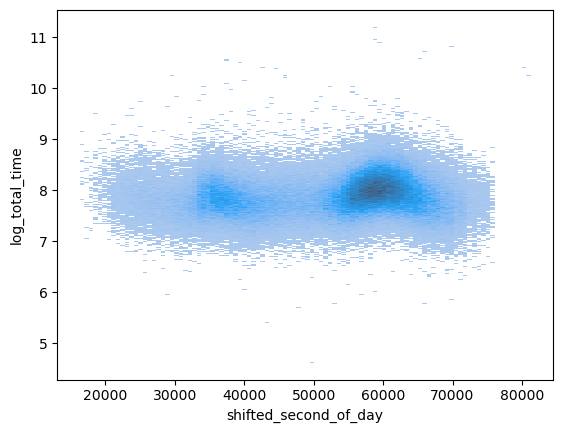

In [297]:
ax = sns.histplot(data=historical_data,x='shifted_second_of_day',y='log_total_time')

Experimenting with fourier

market_id
created_at
actual_delivery_time
store_id
store_primary_category
order_protocol
total_items
subtotal
num_distinct_items
min_item_price
max_item_price
total_onshift_dashers
total_busy_dashers
total_outstanding_orders
estimated_order_place_duration
estimated_store_to_consumer_driving_duration
total_time
log_total_time
store_category_ordinal
total_avail_dashers
log_total_onshift_dashers
log_total_busy_dashers
log_total_outstanding_orders
day_ordinal
hour_ordinal
second_of_day


In [401]:
#cal_fourier_gen = CalendarFourier("D",4)
#cal_fourier_gen.in_sample(historical_data['second_of_day'])

# Writing my own method for the daily fourier

def AddFourierSeconds(X,second_feature,dim):
    period = 24. * 60. * 60. 
    # 2 pi / L
    timescale = 2. * np.pi / period
    for i in range(1,dim+1):
        fourier_feature_sin_name=f'sin_second_{i}'
        fourier_feature_cos_name=f'cos_second_{i}'
        X[fourier_feature_sin_name] = np.sin(i * X[second_feature] * timescale)
        X[fourier_feature_cos_name] = np.cos(i * X[second_feature] * timescale)
    
my_fourier_order = 12    

AddFourierSeconds(historical_data,'shifted_second_of_day',my_fourier_order)
historical_data.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,sin_second_8,cos_second_8,sin_second_9,cos_second_9,sin_second_10,cos_second_10,sin_second_11,cos_second_11,sin_second_12,cos_second_12
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,...,0.749726,0.661748,-0.815507,-0.578748,0.872140,0.489256,-0.918992,-0.394276,0.955536,0.294874
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,...,-0.361082,0.932534,0.403745,-0.914872,-0.445547,0.895259,0.486399,-0.873737,-0.526214,0.850352
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,...,-0.324468,-0.945897,-0.020942,0.999781,0.363793,-0.931480,-0.662184,0.749341,0.879649,-0.475624
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,...,-0.972370,0.233445,0.997640,-0.068668,-0.995185,-0.098017,0.965074,0.261979,-0.908143,-0.418660
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,...,-0.361625,-0.932324,0.999722,-0.023560,-0.317305,0.948324,-0.784235,-0.620464,0.849893,-0.526956


# Notes

After exploration steps, it might be better to rewrite this to extract just the columns from the data that we actually use, to save on memory.

Also, for saving the model to use in step two, will need to use joblib or pickle.

# Model Notes

A basic model to start out with, particularly as a baseline, will be a linear regression. Let's use just the other models, with a constant.

After that, we'll look at tree based models, allowing us to use some of the categorical features. I think the categorical features with a large number of options will need an encoding solution.

For scoring, the given goal is matching the log of the time. 
If we test a model that is purely linear (no log of target or feature) we could take the log of that and score that. That might not work for the R-square function.

In [226]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from xgboost import XGBRegressor



In [300]:
features_1=['estimated_order_place_duration','estimated_store_to_consumer_driving_duration']
X_1=historical_data[features_1].dropna()
y_1=historical_data[['log_total_time','total_time']].dropna()

(y_1,X_1) = y_1.align(X_1,join="inner",axis=0)

model_1 = LinearRegression(fit_intercept=True)
model_1_b = LinearRegression(fit_intercept=True)

X_1_train,X_1_valid,y_1_train,y_1_valid = train_test_split(X_1,y_1,train_size=0.7,random_state=0)

model_1.fit(X_1_train,y_1_train['log_total_time'])
# training on linear instead of log
model_1_b.fit(X_1_train,y_1_train['total_time'])

LinearRegression()

In [301]:
y_1_pred_train=np.exp(model_1.predict(X_1_train))
y_1_pred_valid=np.exp(model_1.predict(X_1_valid))

print(type(y_1_pred_train))
mae_1_train = mean_absolute_error(y_1_train['total_time'],y_1_pred_train)                                
mae_1_valid = mean_absolute_error(y_1_valid['total_time'],y_1_pred_valid)

rmse_1_train = np.sqrt(mean_squared_error(y_1_train['total_time'],y_1_pred_train))                               
rmse_1_valid = np.sqrt(mean_squared_error(y_1_valid['total_time'],y_1_pred_valid))

r_square_1_train = model_1.score(X_1_train,y_1_train['log_total_time'])
r_square_1_valid = model_1.score(X_1_valid,y_1_valid['log_total_time'])

print(f'Model 1 MAE (train) = {mae_1_train:.4f}')
print(f'Model 1 MAE (valid) = {mae_1_valid:.4f}')
print(f'Model 1 RMSE (train) = {rmse_1_train:.4f}')
print(f'Model 1 RMSE (valid) = {rmse_1_valid:.4f}')
print(f'Model 1 R^2 (train) = {r_square_1_train:.4f}')
print(f'Model 1 R^2 (valid) = {r_square_1_valid:.4f}')


y_1_b_pred_train=model_1_b.predict(X_1_train)
y_1_b_pred_valid=model_1_b.predict(X_1_valid)

#y_1_b_pred_train=np.(y_1_b_pred_train)

mae_1_b_train = mean_absolute_error(y_1_train['log_total_time'],y_1_b_pred_train)                                
mae_1_b_valid = mean_absolute_error(y_1_valid['log_total_time'],y_1_b_pred_valid)

rmse_1_b_train = np.sqrt(mean_squared_error(y_1_train['log_total_time'],y_1_b_pred_train))                               
rmse_1_b_valid = np.sqrt(mean_squared_error(y_1_valid['log_total_time'],y_1_b_pred_valid))

r_square_1_b_train = model_1_b.score(X_1_train,y_1_train['total_time'])
r_square_1_b_valid = model_1_b.score(X_1_valid,y_1_valid['total_time'])

print(f'Model 1 b MAE (train) = {mae_1_b_train:.4f}')
print(f'Model 1 b MAE (valid) = {mae_1_b_valid:.4f}')
print(f'Model 1 b RMSE (train) = {rmse_1_b_train:.4f}')
print(f'Model 1 b RMSE (valid) = {rmse_1_b_valid:.4f}')
print(f'Model 1 b R^2 (train) = {r_square_1_b_train:.4f}')
print(f'Model 1 b R^2 (valid) = {r_square_1_b_valid:.4f}')



<class 'numpy.ndarray'>
Model 1 MAE (train) = 775.7616
Model 1 MAE (valid) = 776.8292
Model 1 RMSE (train) = 1159.2258
Model 1 RMSE (valid) = 1160.5080
Model 1 R^2 (train) = 0.0868
Model 1 R^2 (valid) = 0.0866
Model 1 b MAE (train) = 2851.9255
Model 1 b MAE (valid) = 2852.6973
Model 1 b RMSE (train) = 2866.3634
Model 1 b RMSE (valid) = 2867.2588
Model 1 b R^2 (train) = 0.0592
Model 1 b R^2 (valid) = 0.0580


In [302]:
rmse_1_valid/rmse_1_b_valid

0.40474477071435994

Comparing Models 1 and 1b seems to show that fitting the log of the distribution results in an RMSE that is a factor of 2/5 smaller than just fitting the linear part.

In [303]:
# Simplifying running and validating the models 

features_2=['estimated_order_place_duration','estimated_store_to_consumer_driving_duration']
features_2+=['log_total_onshift_dashers','log_total_busy_dashers','log_total_outstanding_orders']

def BuildAndRunModel(data,features,std_features=[]):
    X = data[features].dropna()
    y = data[['log_total_time','total_time']].dropna()
    (y,X) = y.align(X,join="inner",axis=0)
    model = LinearRegression(fit_intercept=True)
    
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size=0.7,random_state=0)

    # Apply standardization
    for feature in std_features:
        if feature not in X.columns:
            print(f"Feature ({feature}) to standardize is not in data")
        else:
            # apply to validation first
            X_valid[feature] = (X_valid[feature] - X_train[feature].mean())/X_train[feature].std()
            X_train[feature] = (X_train[feature] - X_train[feature].mean())/X_train[feature].std()
            print(f"Succesfully normalized feature {feature}")
            
    model.fit(X_train,y_train['log_total_time'])
    
    return (model,X_train,X_valid,y_train,y_valid)

############

def TestModel(model,X_train,X_valid,y_train,y_valid):
    y_pred_train=np.exp(model.predict(X_train))
    y_pred_valid=np.exp(model.predict(X_valid))
    
    mae_train = mean_absolute_error(y_train['total_time'],y_pred_train)                                
    mae_valid = mean_absolute_error(y_valid['total_time'],y_pred_valid)

    rmse_train = np.sqrt(mean_squared_error(y_train['total_time'],y_pred_train))                               
    rmse_valid = np.sqrt(mean_squared_error(y_valid['total_time'],y_pred_valid))
    
    r_square_train = model.score(X_train,y_train['log_total_time'])
    r_square_valid = model.score(X_valid,y_valid['log_total_time'])
    
    print(f'Model MAE (train) = {mae_train:.4f}')
    print(f'Model MAE (valid) = {mae_valid:.4f}')
    print(f'Model RMSE (train) = {rmse_train:.4f}')
    print(f'Model RMSE (valid) = {rmse_valid:.4f}')
    print(f'Model R^2 (train) = {r_square_train:.4f}')
    print(f'Model R^2 (valid) = {r_square_valid:.4f}')
    
    return (y_pred_train,y_pred_valid,mae_valid,rmse_valid,r_square_valid)
    

# Outline of next few linear models:

We will include the estimated order to restaurant and estimated drive duration features as baseline features. We will experiment for by adding features one by one.

We will fit to the log total time, following the lesson from model 1.

Model 2: Dasher Features

* 'log_total_onshift_dashers'
* 'log_total_busy_dashers'
* 'log_total_outstanding_orders'

Model 3: Order features

* 'subtotal'
* 'num_distinct_items'

We will standardize the order features.


In [304]:
features_2=['estimated_order_place_duration','estimated_store_to_consumer_driving_duration']
features_2+=['log_total_onshift_dashers','log_total_busy_dashers','log_total_outstanding_orders']


X_2=historical_data[features_2].dropna()
y_2=historical_data[['log_total_time','total_time']].dropna()

(y_2,X_2) = y_2.align(X_2,join="inner",axis=0)

model_2 = LinearRegression(fit_intercept=True)

X_2_train,X_2_valid,y_2_train,y_2_valid = train_test_split(X_2,y_2,train_size=0.7,random_state=0)

model_2.fit(X_2_train,y_2_train['log_total_time'])

LinearRegression()

In [305]:
y_2_pred_train=np.exp(model_2.predict(X_2_train))
y_2_pred_valid=np.exp(model_2.predict(X_2_valid))

print(type(y_2_pred_train))
mae_2_train = mean_absolute_error(y_2_train['total_time'],y_2_pred_train)                                
mae_2_valid = mean_absolute_error(y_2_valid['total_time'],y_2_pred_valid)

rmse_2_train = np.sqrt(mean_squared_error(y_2_train['total_time'],y_2_pred_train))                               
rmse_2_valid = np.sqrt(mean_squared_error(y_2_valid['total_time'],y_2_pred_valid))

r_square_2_train = model_2.score(X_2_train,y_2_train['log_total_time'])
r_square_2_valid = model_2.score(X_2_valid,y_2_valid['log_total_time'])

print(f'Model 2 MAE (train) = {mae_2_train:.4f}')
print(f'Model 2 MAE (valid) = {mae_2_valid:.4f}')
print(f'Model 2 RMSE (train) = {rmse_2_train:.4f}')
print(f'Model 2 RMSE (valid) = {rmse_2_valid:.4f}')
print(f'Model 2 R^2 (train) = {r_square_2_train:.4f}')
print(f'Model 2 R^2 (valid) = {r_square_2_valid:.4f}')

<class 'numpy.ndarray'>
Model 2 MAE (train) = 706.7119
Model 2 MAE (valid) = 709.0097
Model 2 RMSE (train) = 1065.0166
Model 2 RMSE (valid) = 1105.1575
Model 2 R^2 (train) = 0.2273
Model 2 R^2 (valid) = 0.2329


In [306]:
model_2_group=BuildAndRunModel(historical_data,features_2)
#(model,X_train,X_valid,y_train,y_valid)
#TestModel(model,X_train,X_valid,y_train,y_valid)
model_2_results=TestModel(model_2_group[0],model_2_group[1],model_2_group[2],model_2_group[3],model_2_group[4])


Model MAE (train) = 706.7119
Model MAE (valid) = 709.0097
Model RMSE (train) = 1065.0166
Model RMSE (valid) = 1105.1575
Model R^2 (train) = 0.2273
Model R^2 (valid) = 0.2329


Mild improvement from 1160 to 1105 for the RMSE. Huge improvement in $R^{2}$ from 0.0868 to 0.2329.

In [307]:
features_3=['estimated_order_place_duration','estimated_store_to_consumer_driving_duration']
features_3+=['subtotal','num_distinct_items']

model_3_group=BuildAndRunModel(historical_data,features_3)
model_3_results=TestModel(model_3_group[0],model_3_group[1],model_3_group[2],model_3_group[3],model_3_group[4])


Model MAE (train) = 752.5786
Model MAE (valid) = 754.4509
Model RMSE (train) = 1136.4599
Model RMSE (valid) = 1137.7596
Model R^2 (train) = 0.1371
Model R^2 (valid) = 0.1369


In [308]:
print(f'Model 1 RMSE (valid) = {rmse_1_valid:.4f}')
print(f'Model 1 R^2 (valid) = {r_square_1_valid:.4f}')

Model 1 RMSE (valid) = 1160.5080
Model 1 R^2 (valid) = 0.0866


Model 3 is better than model 1 in RMSE and $R^{2}$, not as good as model 2.
Now try model 3b, in which we standardize the order information

In [309]:
features_3=['estimated_order_place_duration','estimated_store_to_consumer_driving_duration']
features_3+=['subtotal','num_distinct_items']

standardize_features=['subtotal','num_distinct_items']

model_3b_group=BuildAndRunModel(historical_data,features_3,std_features=standardize_features)
model_3b_results=TestModel(model_3b_group[0],model_3b_group[1],model_3b_group[2],model_3b_group[3],model_3b_group[4])


Succesfully normalized feature subtotal
Succesfully normalized feature num_distinct_items
Model MAE (train) = 752.5786
Model MAE (valid) = 754.4509
Model RMSE (train) = 1136.4599
Model RMSE (valid) = 1137.7596
Model R^2 (train) = 0.1371
Model R^2 (valid) = 0.1369


No change with the standardization. For this simple linear model, this makes sense. The change should just be a change in parameters and intercepts. We can check if this is reflected in the constant intercept term. It may be worth doing if we start regularizing the fits.

In [310]:
model_3_intercept=model_3_group[0].intercept_
model_3b_intercept=model_3b_group[0].intercept_

print(f"Models 3 and 3b have intercepts {model_3_intercept} and {model_3b_intercept}, respectively")


Models 3 and 3b have intercepts 7.394918141303624 and 7.520832711893098, respectively


Next, I will create model 4, using all the features used in the previous models. 

After that, we should examine in the categorical and time features. These would not be easy to include in a linear model. Perhaps fourier series could be used for the time features, but I suspect that the time dependence is explained by the dasher features. So, at this point, I think it would be worthwhile to examine the residuals from the the previous fits, and see if they are correlated with these remaining variables.

In [311]:
# Model 4

features_4=['estimated_order_place_duration','estimated_store_to_consumer_driving_duration']
features_4+=['log_total_onshift_dashers','log_total_busy_dashers','log_total_outstanding_orders']
features_4+=['subtotal','num_distinct_items']

standardize_features=['subtotal','num_distinct_items']

model_4_group=BuildAndRunModel(historical_data,features_4,std_features=standardize_features)
model_4_results=TestModel(model_4_group[0],model_4_group[1],model_4_group[2],model_4_group[3],model_4_group[4])


Succesfully normalized feature subtotal
Succesfully normalized feature num_distinct_items
Model MAE (train) = 687.0927
Model MAE (valid) = 688.4179
Model RMSE (train) = 1044.9796
Model RMSE (valid) = 1084.7987
Model R^2 (train) = 0.2685
Model R^2 (valid) = 0.2758


<Axes: xlabel='Model Name', ylabel='Model R^2'>

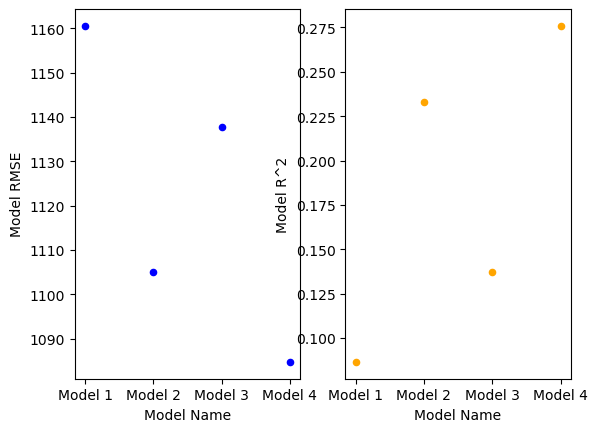

In [396]:
# Plot the RMSE, and R-squares

model_names=['Model 1','Model 2','Model 3','Model 4']
model_rmse_valid   =[rmse_1_valid,model_2_results[3],model_3_results[3],model_4_results[3]]
model_rsquare_valid=[r_square_1_valid,model_2_results[4],model_3_results[4],model_4_results[4]]
model_scores_dict={'Model Name':model_names,'Model RMSE':model_rmse_valid,'Model R^2':model_rsquare_valid}
model_scores_df=pd.DataFrame(model_scores_dict)
fig, axes = plt.subplots(nrows=1,ncols=2)
model_scores_df.plot(x='Model Name',y='Model RMSE',ax=axes[0],color='blue',kind='scatter')
model_scores_df.plot(x='Model Name',y='Model R^2',ax=axes[1],color='orange',kind='scatter')

In [313]:
# Residuals
# have model_4_group = (model,X_train,X_valid,y_train,y_valid)
# have model_4_results = (y_pred_train,y_pred_valid,mae_valid,rmse_valid,r_square_valid)

print(type(model_4_group[3]))
print(model_4_group[3].head())
print(type(model_4_results[0]))

residual_4_train = model_4_group[3]['total_time'] - model_4_results[0]
residual_4_valid = model_4_group[4]['total_time'] - model_4_results[1]

<class 'pandas.core.frame.DataFrame'>
        log_total_time  total_time
51948         8.029107        3069
13969         8.419360        4534
135506        8.052615        3142
41694         7.995644        2968
74132         7.734121        2285
<class 'numpy.ndarray'>


In [336]:
residual_4_train.rename('delta_total_time',inplace=True)
print(type(residual_4_train))
print(residual_4_train.head())
residual_4_valid.rename('delta_total_time',inplace=True)
print(type(residual_4_valid))
print(residual_4_valid.head())

<class 'pandas.core.series.Series'>
51948     -187.644257
13969     -168.531395
135506     117.358494
41694     -328.866901
74132    -1146.456479
Name: delta_total_time, dtype: float64
<class 'pandas.core.series.Series'>
66605     -487.529286
168876    -603.188626
192174     748.579854
157477     157.190009
164669    1004.401730
Name: delta_total_time, dtype: float64


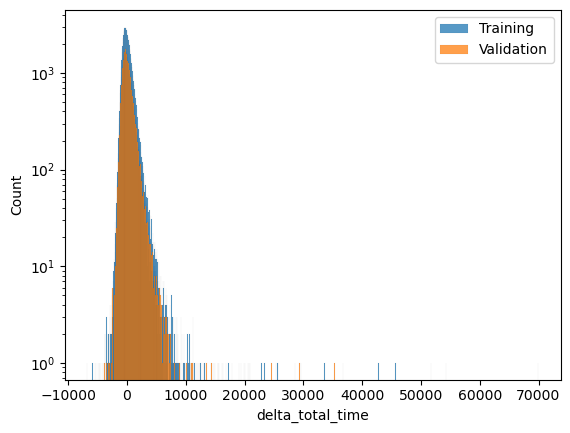

In [398]:
ax=sns.histplot(residual_4_train,label="Training")
sns.histplot(residual_4_valid,ax=ax,label="Validation")
ax.set_yscale('log')
ax.legend()

# Now: are these correlated with the categorical and time features?

Can look at time features:
 * shifted_second_of_day
 * sin_second_4, etc. (useful for models)
 * day_ordinal
 * hour_ordinal
 
 
 Can look at categorical features:
 * order_protocol
 * market_id
 * store_category_ordinal

In [402]:
time_feature_names=[]

fourier_order_for_fitting = 12
if (fourier_order_for_fitting > my_fourier_order):
    print("Error: trying to fit more fourier terms than have been produced")


for i in range(1,fourier_order_for_fitting+1):
    name=f'sin_second_{i}'
    time_feature_names.append(name)
    name=f'cos_second_{i}'
    time_feature_names.append(name)

#time_feature_names.append('day_ordinal')
#time_feature_names.append('hour_ordinal')
time_feature_names.append('shifted_second_of_day')

cat_feature_names=['order_protocol','market_id']
#cat_feature_names.append('store_category_ordinal')

time_cat_feature_names=time_feature_names+cat_feature_names

time_features_X=historical_data[time_feature_names]
print(time_features_X.head())

cat_time_features_X = historical_data[time_cat_feature_names]
#cat_time_features_X.head()

#time_features_X_train_4 = historical_data[time_feature_names]
#time_features_X_train_4.head()

# need to align? or just use inner merge in concatenating the dataframes

residual_4_train_with_features=pd.DataFrame(residual_4_train).join(time_features_X)
residual_4_valid_with_features=pd.DataFrame(residual_4_valid).join(time_features_X)


#residual_4_train_with_features=residual_4_train.join(time_features_X)
#residual_4_valid_with_features=residual_4_valid.join(time_features_X)


print(residual_4_train_with_features.head())

#ax=sns.histplot(data=residual_4_train,X='shifted_second_of_day',y=)

   sin_second_1  cos_second_1  sin_second_2  cos_second_2  sin_second_3  \
0     -0.105758     -0.994392      0.210330      0.977631     -0.312542   
1      0.046162     -0.998934     -0.092226      0.995738      0.138093   
2      0.344206     -0.938894     -0.646346      0.763044      0.869495   
3      0.166123     -0.986105     -0.327630      0.944806      0.480032   
4     -0.940585     -0.339559      0.638768     -0.769400      0.506786   

   cos_second_3  sin_second_4  cos_second_4  sin_second_5  cos_second_5  ...  \
0     -0.949904      0.411249      0.911523     -0.505344     -0.862918  ...   
1     -0.990419     -0.183665      0.982989      0.228846     -0.973463  ...   
2     -0.493942     -0.986381      0.164474      0.982721      0.185095  ...   
3     -0.877251     -0.619094      0.785317      0.740951     -0.671559  ...   
4      0.862072     -0.982935      0.183951      0.160743     -0.986996  ...   

   cos_second_8  sin_second_9  cos_second_9  sin_second_10  cos_seco

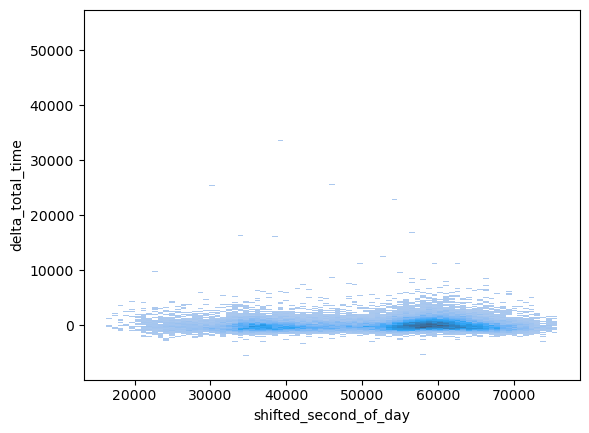

In [403]:
ax=sns.histplot(data=residual_4_train_with_features,x='shifted_second_of_day',y='delta_total_time')

In [354]:
#ax=sns.histplot(data=residual_4_train_with_features,x='sin_second_1',y='delta_total_time')

To study this better (without fitting), I need to look at the mean and std of the delta total time

<class 'pandas.core.series.Series'>


Text(0, 0.5, 'Mean Residual in Total Time (sec)')

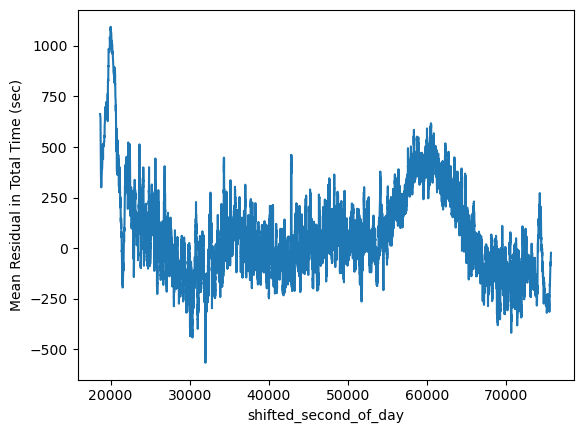

In [404]:
mean_delta_vs_second = residual_4_train_with_features.groupby('shifted_second_of_day').delta_total_time.mean()
print(type(mean_delta_vs_second))
#ax=mean_delta_vs_second.plot()
mean_delta_vs_second_rolling = mean_delta_vs_second.rolling(window=60).mean()
ax=mean_delta_vs_second_rolling.plot()
ax.set_ylabel('Mean Residual in Total Time (sec)')
#residual_4_train_with_features['second_delta_mean']=residual_4_train_with_features

There is still some time dependence in the residual. For example, around 60000 seconds (shifted) the model is underestimating the total time by around 450 seconds. This seems to also be during the busiest time. There is also a spike near 20000 seconds. Given the low number of orders around then, this probably isn't important.

Text(0, 0.5, 'Standard Deviation of Residual in Total Time (sec)')

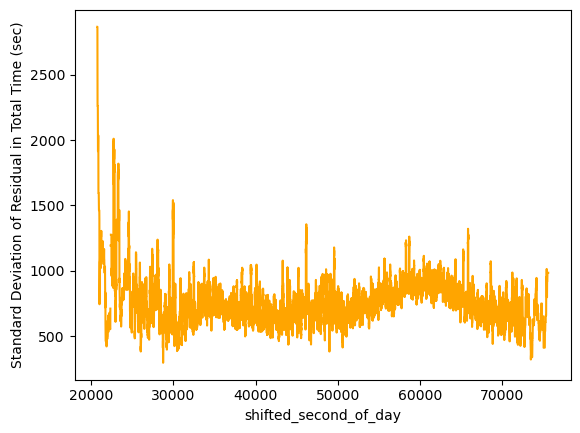

In [405]:
std_delta_vs_second = residual_4_train_with_features.groupby('shifted_second_of_day').delta_total_time.std()
std_delta_vs_second_rolling = std_delta_vs_second.rolling(window=60,min_periods=3).mean()
ax=std_delta_vs_second_rolling.plot(color='orange')
ax.set_ylabel('Standard Deviation of Residual in Total Time (sec)')

The standard deviation is also higher around the 60000 time, around 800. This suggests that even if we apply a linear shift to correct for the time dependence, the RMSE of the model will not get below this value. Still, adding a time-dependent correction should push the RMSE down from around 1000 to around 800.

An alternative is to run the first fit with the time dependent terms as well. If the model is linear, this might not account for any interaction between the time and variables such as the dasher variables. A neural net would be good for that.

For now, to fit the residuals to the time, two main options:
* Fit a linear regression with the residual data frame and the fourier time series features
* Fit a linear regression to the mean delta total time.
The latter would be computationally easier and easier to communicate. But the former would make it much easier to evaluate the results of the fit on both the training and validation data.

In [406]:
for col in residual_4_train_with_features.columns:
    print (col)

delta_total_time
sin_second_1
cos_second_1
sin_second_2
cos_second_2
sin_second_3
cos_second_3
sin_second_4
cos_second_4
sin_second_5
cos_second_5
sin_second_6
cos_second_6
sin_second_7
cos_second_7
sin_second_8
cos_second_8
sin_second_9
cos_second_9
sin_second_10
cos_second_10
sin_second_11
cos_second_11
sin_second_12
cos_second_12
shifted_second_of_day


In [428]:
time_reg_fit_lambda = 10

#fourier_regression_4 = LinearRegression(fit_intercept=True)
fourier_regression_4 = Lasso(fit_intercept=True,alpha = time_reg_fit_lambda)
#fourier_regression_4 = Ridge(fit_intercept=True,alpha = time_reg_fit_lambda)


#residual_4_train_with_features=pd.DataFrame(residual_4_train).join(time_features_X)
#residual_4_valid_with_features=pd.DataFrame(residual_4_valid).join(time_features_X)

time_reg_X_train = residual_4_train_with_features[time_feature_names]
time_reg_X_valid = residual_4_valid_with_features[time_feature_names]

time_reg_y_train = residual_4_train_with_features['delta_total_time']
time_reg_y_valid = residual_4_valid_with_features['delta_total_time']

fourier_regression_4.fit(time_reg_X_train,time_reg_y_train)

# could fit mean_delta_vs_second_rolling or mean_delta_vs_second
# The rolling one might be more practical.
#print(mean_delta_vs_second_rolling)

Lasso(alpha=10)

In [429]:
fourier_reg_4_pred_train = fourier_regression_4.predict(time_reg_X_train)
fourier_reg_4_pred_valid = fourier_regression_4.predict(time_reg_X_valid)

fourier_Reg_4_rmse_train = np.sqrt(mean_squared_error(time_reg_y_train,fourier_reg_4_pred_train))
fourier_Reg_4_rmse_valid = np.sqrt(mean_squared_error(time_reg_y_valid,fourier_reg_4_pred_valid))

fourier_Reg_4_rsquare_train = fourier_regression_4.score(time_reg_X_train,time_reg_y_train)
fourier_Reg_4_rsquare_valid = fourier_regression_4.score(time_reg_X_valid,time_reg_y_valid)

print(f'Residual 4 Time Regresion (train) RMSE = {fourier_Reg_4_rmse_train:.4f}')
print(f'Residual 4 Time Regresion (valid) RMSE = {fourier_Reg_4_rmse_valid:.4f}')

print(f'Residual 4 Time Regresion (train) R^2 = {fourier_Reg_4_rsquare_train:.4f}')
print(f'Residual 4 Time Regresion (valid) R^2 = {fourier_Reg_4_rsquare_valid:.4f}')



Residual 4 Time Regresion (train) RMSE = 1020.5720
Residual 4 Time Regresion (valid) RMSE = 1059.8123
Residual 4 Time Regresion (train) R^2 = 0.0289
Residual 4 Time Regresion (valid) R^2 = 0.0295


In [409]:
residual_4_train_with_features.delta_total_time.std()

1035.666648457286

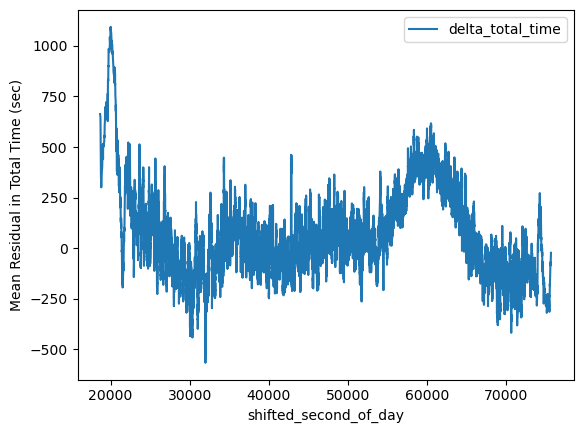

In [422]:
ax=mean_delta_vs_second_rolling.plot()
ax.set_ylabel('Mean Residual in Total Time (sec)')
#fourier_reg_4_pred_train_series=pd.Series(fourier_reg_4_pred_train)
plt.legend()

# Export model for usage

Currently, looking at two parts to export: the regression with the first set of variables, plus a time-dependent correction.

Some tools for exporting models:
* Pickle (guide: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)
    * Save with 'pickle.dump(model, open(filename, 'wb'))'
    * Open with 'loaded_model = pickle.load(open(filename, 'rb'))'
* JobLib (guide for Pickle and Joblib: https://mljar.com/blog/save-load-scikit-learn-model/)
    * Save with 'joblib.dump(rf, filename)'
    * Open with 'loaded_model = joblib.load(filename)'

According to the mljar.com source, Pickle is faster while Joblib has better compression options. Given the small number of features, there is no way we will build a large model needing compression.

In [395]:
import pickle

In [432]:
model_part1_file="part1model.sav"
model_part1 = model_4_group[0]
pickle.dump(model_part1,open(model_part1_file,'wb'))

One next step: write script to use model to make prediction to make predictions from data_to_predict.json to a tsv with columns 'delivery_id', 'predicted_delivery_seconds' 

